### Compare predictions from Perple_X Databases

In [3]:
#Step 1 - Import a geotherm
import pickle
from geotherm import *
gts={}

tag = 'max'

fin = open('geotherm/geotherm_ColoradoPlateau_%s.pickle' % tag,'rb')
gt = pickle.load(fin)
fin.close()

gts[tag] = gt

1 1 --
2 2 :
3 0 -
4 1 --
5 2 :
6 0 -


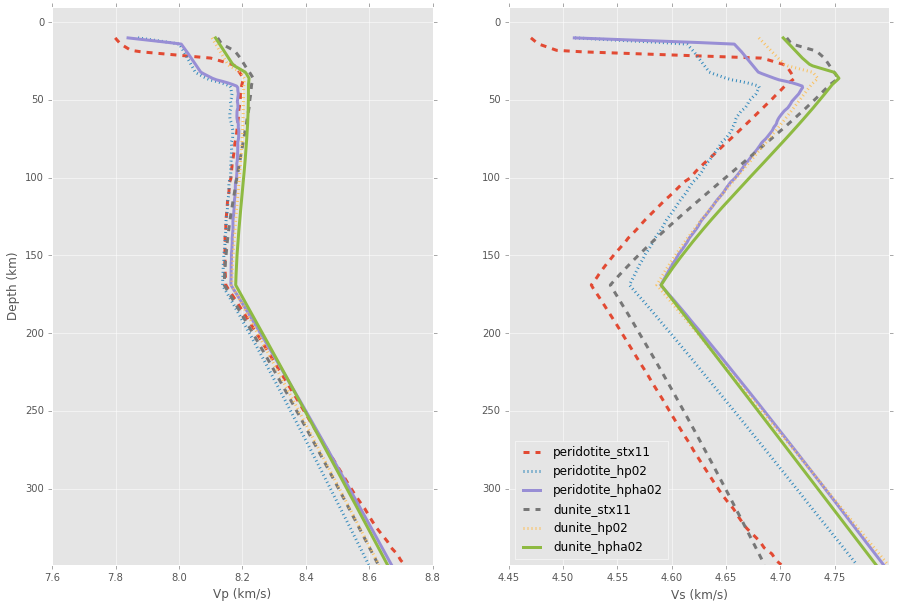

In [22]:
#Step 2 - Import mappings for P-T calculation
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pylab as plt
%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(1,(15,10))

ls = ['-','--',':']
ii=0

for database in ['peridotite_stx11', 'peridotite_hp02','peridotite_hpha02','dunite_stx11','dunite_hp02', 'dunite_hpha02']:
    fin = open('perplex/%s/funs.pickle' % (database),'rb')
    [frho,fvp,fvs] = pickle.load(fin)
    fin.close()

    def extract_profile(fun, gt):
        from scipy.interpolate import interp1d

        vs, zs = [],[]
        for ii, eachz in enumerate(gt.depths):

            val = fun(gt.temps[ii], eachz)

            vs.append(val[0])
            zs.append(eachz)

        return interp1d(zs,vs)

    #ls = ['red','blue']

    for kk,tag in enumerate(gts):
        fvp_gt  = extract_profile(fvp, gts[tag])
        fvs_gt  = extract_profile(fvs, gts[tag])
        frho_gt = extract_profile(frho, gts[tag])

    zs = range(10,350)
    
    ii += 1
    
    jj = ii%3
    
    ls0= ls[jj]
    
    print(ii, jj, ls0)
    
    ax1=plt.subplot(1,2,1)
    plt.plot(fvp_gt(zs), zs, label=database, lw=3, ls=ls0)
    ax2=plt.subplot(1,2,2)
    plt.plot(fvs_gt(zs), zs, label=database, lw=3, ls=ls0)
    #ax3=plt.subplot(1,3,3)
    #plt.plot(frho_gt(zs), zs, label=database, lw=3, ls=ls0)

for ax in [ax1,ax2,ax3]:
    #ax.set_xlim(3.8,5.0)
    ax.set_ylim(max(zs), -10)
    
plt.legend(loc=3)
ax1.set_ylabel('Depth (km)')
ax1.set_xlabel('Vp (km/s)')
ax2.set_xlabel('Vs (km/s)')
_ = ax3.set_xlabel('Rho (g/cc)')